In [8]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

# this is needed to compensate for %matplotl+ib notebook's tendancy lotted inline
from matplotlib import rcParams
rcParams["figure.autolayout"] = True

In [9]:
# gradient descent function
def gradient_descent(g, alpha, max_its, w):
    #compute the gradient of our input function - note this is a function tool
    gradient = grad(g)
    #define a list to record the history of w
    history = []
    #run the gradient descent loop
    best_w = w
    best_eval = g(w)
    for k in range(max_its):
        #evaluate the gradient
        grad_eval = gradient(w)
        #take gradient descent step
        w = w - alpha * grad_eval
        history.append(w)
        #return only the weighted providing the lowest evaluation
        test_eval = g(w)
        if test_eval < best_eval:
            best_eval = test_eval
            best_w = w
    return best_w, history


In [10]:
csvname = "kleibers_law_data.csv"
data = np.loadtxt(csvname, delimiter = ',')
data = data.T
x = data[:,0]
y = data[:,-1]
x = np.log(x)
y = np.log(y)
print(x.shape)

(1498,)


In [11]:
# define least square cost function
def least_squares(w):
    cost = 0
    for p in range(len(y)):
        cost += (w[0] + w[1]*x[p] - y[p])**2
    return cost

In [12]:
# initialize parameters
alpha = 10**-3
max_its = 500
w_init = np.asarray([1.5,1.5])

In [13]:
# run gradient descent, create cost function history
best_weight, weight_history = gradient_descent(least_squares, alpha, max_its, w_init)
cost_history = [least_squares(v) for v in weight_history]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


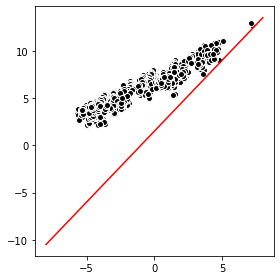

In [14]:
# scatter plot the input data
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(x,y,color = 'k',edgecolor = 'w')
x_vals = np.linspace(-8,8,500)
y_vals = best_weight[0] + best_weight[1]*x_vals
ax.plot(x_vals,y_vals,color = 'r')
plt.show()